In [366]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, precision_score, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn import metrics
import time
from sklearn.model_selection import cross_validate

In [367]:
#First we Load the waterpump data
training_values = pd.read_csv('Training_set_values.csv')
training_labels = pd.read_csv('Training_set_labels.csv')
testing_data = pd.read_csv('Test_set_values.csv')
train = training_values
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [368]:
#Here we learn that there are 10 quantitative dtypes and 30 qualitative dtypes 
training_values.info()
training_values.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55765 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59400 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [369]:
#Select features

training_features = training_values
training_features_sns = training_features
training_features_sns['status_group'] = training_labels['status_group']
training_features.isnull().sum()
testing_data.isnull().sum()

id                          0
amount_tsh                  0
date_recorded               0
funder                    869
gps_height                  0
installer                 877
longitude                   0
latitude                    0
wpt_name                    0
num_private                 0
basin                       0
subvillage                 99
region                      0
region_code                 0
district_code               0
lga                         0
ward                        0
population                  0
public_meeting            821
recorded_by                 0
scheme_management         969
scheme_name              7092
permit                    737
construction_year           0
extraction_type             0
extraction_type_group       0
extraction_type_class       0
management                  0
management_group            0
payment                     0
payment_type                0
water_quality               0
quality_group               0
quantity  

# Data Cleaning

In [370]:
#Replace columns with mode
for column in train.columns:
    train[column].fillna(train[column].mode()[0], inplace = True)
    
for column in testing_data.columns:
    testing_data[column].fillna(testing_data[column].mode()[0], inplace = True)

In [371]:
#Convert date_recorded to datetime object, split into 3 columns, drop date_recorded, and add back into dataset as (Year, Month, Day) 
def date_split(yourdata):
    df = yourdata
    date_recorded = pd.DataFrame(pd.to_datetime(df['date_recorded']))
    Date_time = pd.DataFrame(columns=['Recorded_Year'])
    Date_time['Recorded_Year'] = date_recorded['date_recorded'].dt.year
    Date_time['Recorded_Month'] = date_recorded['date_recorded'].dt.month
    Date_time['Recorded_Day'] = date_recorded['date_recorded'].dt.day
    df['Recorded_Year'], df['Recorded_Month'], df['Recorded_Day'] = Date_time['Recorded_Year'], Date_time['Recorded_Month'], Date_time['Recorded_Day']
    #df.drop('date_recorded',axis=1, inplace = True)
    return df

In [372]:
#Apply date split function
train = date_split(train)
testing_data = date_split(testing_data)



In [373]:
#Converting date to number and use only the year
train.date_recorded = train['date_recorded'].str.replace("-", " ")
train.date_recorded = train.date_recorded.str[:4]
train.date_recorded = train.date_recorded.astype(int)

testing_data.date_recorded = testing_data['date_recorded'].str.replace("-", " ")
testing_data.date_recorded = testing_data.date_recorded.str[:4]
testing_data.date_recorded = testing_data.date_recorded.astype(int)

train.date_recorded.head()

0    2011
1    2013
2    2013
3    2013
4    2011
Name: date_recorded, dtype: int32

In [374]:
#Imput 0s with the Median for each Region Code since Region Code is more likely to be accurate
#Imput the remaining 0s not covered by the Region_code by basin since there is no better alternative
train['construction_year'].replace(0,np.NAN, inplace=True)
train['construction_year'].fillna(train.groupby(['region_code'])['construction_year'].transform('median').round(0), inplace = True)
train['construction_year'].fillna(train.groupby(['basin'])['construction_year'].transform('median').round(0), inplace = True)

testing_data['construction_year'].replace(0,np.NAN, inplace=True)
testing_data['construction_year'].fillna(testing_data.groupby(['region_code'])['construction_year'].transform('median').round(0), inplace = True)
testing_data['construction_year'].fillna(testing_data.groupby(['basin'])['construction_year'].transform('median').round(0), inplace = True)

In [375]:
testing_data['population'].value_counts()

0        5453
1        1757
150       436
200       430
250       406
300       366
50        298
100       273
350       266
500       265
120       219
400       207
30        153
60        150
80        149
40        132
450       117
600       113
230       102
20         96
90         81
800        78
130        67
35         66
25         65
75         62
320        62
70         61
1000       58
15         58
45         55
360        54
210        49
1500       47
180        43
1200       41
10         40
700        39
560        39
140        38
65         38
240        37
650        37
125        37
160        31
420        31
55         31
750        30
96         30
2000       30
86         27
260        25
270        25
56         24
220        24
98         24
340        23
540        23
850        23
280        22
145        21
380        20
530        19
900        19
520        19
550        18
3000       18
170        18
480        17
950        16
245        16
430   

# Feature Engineering

In [376]:
waterpoint_age_train = train['date_recorded'].astype(int) - train['construction_year'].astype(int)
waterpoint_age_test = testing_data['date_recorded'].astype(int) - testing_data['construction_year'].astype(int)
train['waterpoint_age'] = waterpoint_age_train
testing_data['waterpoint_age'] = waterpoint_age_test

In [377]:
#train['waterpoint_type - waterpoint_type_group']= train['waterpoint_type'] + ' - ' + train['waterpoint_type_group']
#testing_data['waterpoint_type - waterpoint_type_group']= testing_data['waterpoint_type'] + ' - ' + testing_data['waterpoint_type_group']

#train['source - source_type - source_class']= train['source'] + ' - ' + train['source_type']+ ' - ' + train['source_class']
#testing_data['source - source_type - source_class']= testing_data['source'] + ' - ' + testing_data['source_type']+ ' - ' + testing_data['source_class']

#train['extraction_type - extraction_type_group - extraction_type_class']= train['extraction_type'] + ' - ' + train['extraction_type_group']+ ' - ' + train['extraction_type_class']
#testing_data['extraction_type - extraction_type_group - extraction_type_class']= testing_data['extraction_type'] + ' - ' + testing_data['extraction_type_group']+ ' - ' + testing_data['extraction_type_class']

#train['water_quality - quality_group']= train['water_quality'] + ' - ' + train['quality_group']
#testing_data['water_quality - quality_group']= testing_data['water_quality'] + ' - ' + testing_data['quality_group']




In [378]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()

train.status_group=le.fit_transform(train.status_group)
train.status_group.head()

0    0
1    0
2    0
3    2
4    0
Name: status_group, dtype: int32

In [379]:
#New Ordinal encoder
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()

#encode training data
train_objects = train[train.select_dtypes(include=[object]).columns]
enc.fit(train_objects)
train_objects = enc.transform(train_objects)
train_objects = pd.DataFrame(data=train_objects, columns=train.select_dtypes(include=[object]).columns)
train[train.select_dtypes(include=[object]).columns] = train_objects


#encode test data
test_objects = testing_data[testing_data.select_dtypes(include=[object]).columns]
enc.fit(test_objects)
test_objects = enc.transform(test_objects)
test_objects = pd.DataFrame(data=test_objects, columns=testing_data.select_dtypes(include=[object]).columns)
testing_data[testing_data.select_dtypes(include=[object]).columns] = test_objects

train.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group,Recorded_Year,Recorded_Month,Recorded_Day,waterpoint_age
0,69572,6000.0,2011,1369.0,1390,1518.0,34.938093,-9.856322,37399.0,0,1.0,11807.0,3.0,11,5,51.0,1426.0,109,True,0.0,7.0,2245.0,False,1999.0,3.0,1.0,0.0,7.0,4.0,2.0,0.0,6.0,2.0,1.0,1.0,8.0,6.0,0.0,1.0,1.0,0,2011,3,14,12
1,8776,0.0,2013,469.0,1399,545.0,34.698766,-2.147466,37195.0,0,4.0,15838.0,9.0,20,2,103.0,1576.0,280,True,0.0,2.0,598.0,True,2010.0,3.0,1.0,0.0,11.0,4.0,0.0,2.0,6.0,2.0,2.0,2.0,5.0,3.0,1.0,1.0,1.0,0,2013,3,6,3
2,34310,25.0,2013,825.0,686,2048.0,37.460664,-3.821329,14572.0,0,5.0,9074.0,8.0,21,4,108.0,1624.0,250,True,0.0,7.0,2121.0,True,2009.0,3.0,1.0,0.0,7.0,4.0,4.0,5.0,6.0,2.0,1.0,1.0,0.0,1.0,1.0,2.0,1.0,0,2013,2,25,4
3,67743,0.0,2013,1741.0,263,1852.0,38.486161,-11.155298,37285.0,0,7.0,8982.0,12.0,90,63,87.0,1571.0,58,True,0.0,7.0,598.0,True,1986.0,14.0,10.0,5.0,7.0,4.0,0.0,2.0,6.0,2.0,0.0,0.0,3.0,0.0,0.0,2.0,1.0,2,2013,1,28,27
4,19728,0.0,2011,20.0,0,119.0,31.130847,-1.825359,35529.0,0,4.0,7698.0,4.0,18,1,26.0,1687.0,0,True,0.0,7.0,598.0,True,2008.0,3.0,1.0,0.0,1.0,1.0,0.0,2.0,6.0,2.0,3.0,3.0,5.0,3.0,1.0,1.0,1.0,0,2011,7,13,3


In [380]:
testing_data.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,Recorded_Year,Recorded_Month,Recorded_Day,waterpoint_age
0,50785,0.0,2013,175.0,1996,214.0,35.290799,-4.059696,656.0,0,0.0,3916.0,8.0,21,3,63.0,17.0,321,True,0.0,2.0,395.0,True,2012.0,9.0,6.0,3.0,3.0,2.0,0.0,2.0,6.0,2.0,3.0,3.0,5.0,3.0,1.0,6.0,5.0,2013,2,4,1
1,51630,0.0,2013,250.0,1569,221.0,36.656709,-3.309214,1780.0,0,5.0,2717.0,0.0,2,2,0.0,650.0,300,True,0.0,6.0,1610.0,True,2000.0,3.0,1.0,0.0,7.0,4.0,0.0,2.0,6.0,2.0,2.0,2.0,8.0,6.0,0.0,1.0,1.0,2013,2,4,13
2,17168,0.0,2013,250.0,1567,221.0,34.767863,-5.004344,9673.0,0,0.0,5398.0,18.0,13,2,109.0,1677.0,500,True,0.0,6.0,1453.0,True,2010.0,9.0,6.0,3.0,7.0,4.0,0.0,2.0,6.0,2.0,2.0,2.0,5.0,3.0,1.0,6.0,5.0,2013,2,1,3
3,45559,0.0,2013,222.0,267,262.0,38.058046,-9.418672,5595.0,0,7.0,2795.0,7.0,80,43,49.0,1192.0,250,True,0.0,6.0,395.0,True,1987.0,9.0,6.0,3.0,7.0,4.0,6.0,6.0,6.0,2.0,0.0,0.0,7.0,5.0,0.0,6.0,5.0,2013,1,22,26
4,49871,500.0,2013,73.0,1260,75.0,35.006123,-10.950412,5706.0,0,7.0,3544.0,16.0,10,3,61.0,1075.0,60,True,0.0,9.0,76.0,True,2000.0,3.0,1.0,0.0,9.0,4.0,3.0,1.0,6.0,2.0,1.0,1.0,8.0,6.0,0.0,1.0,1.0,2013,3,27,13


<AxesSubplot:>

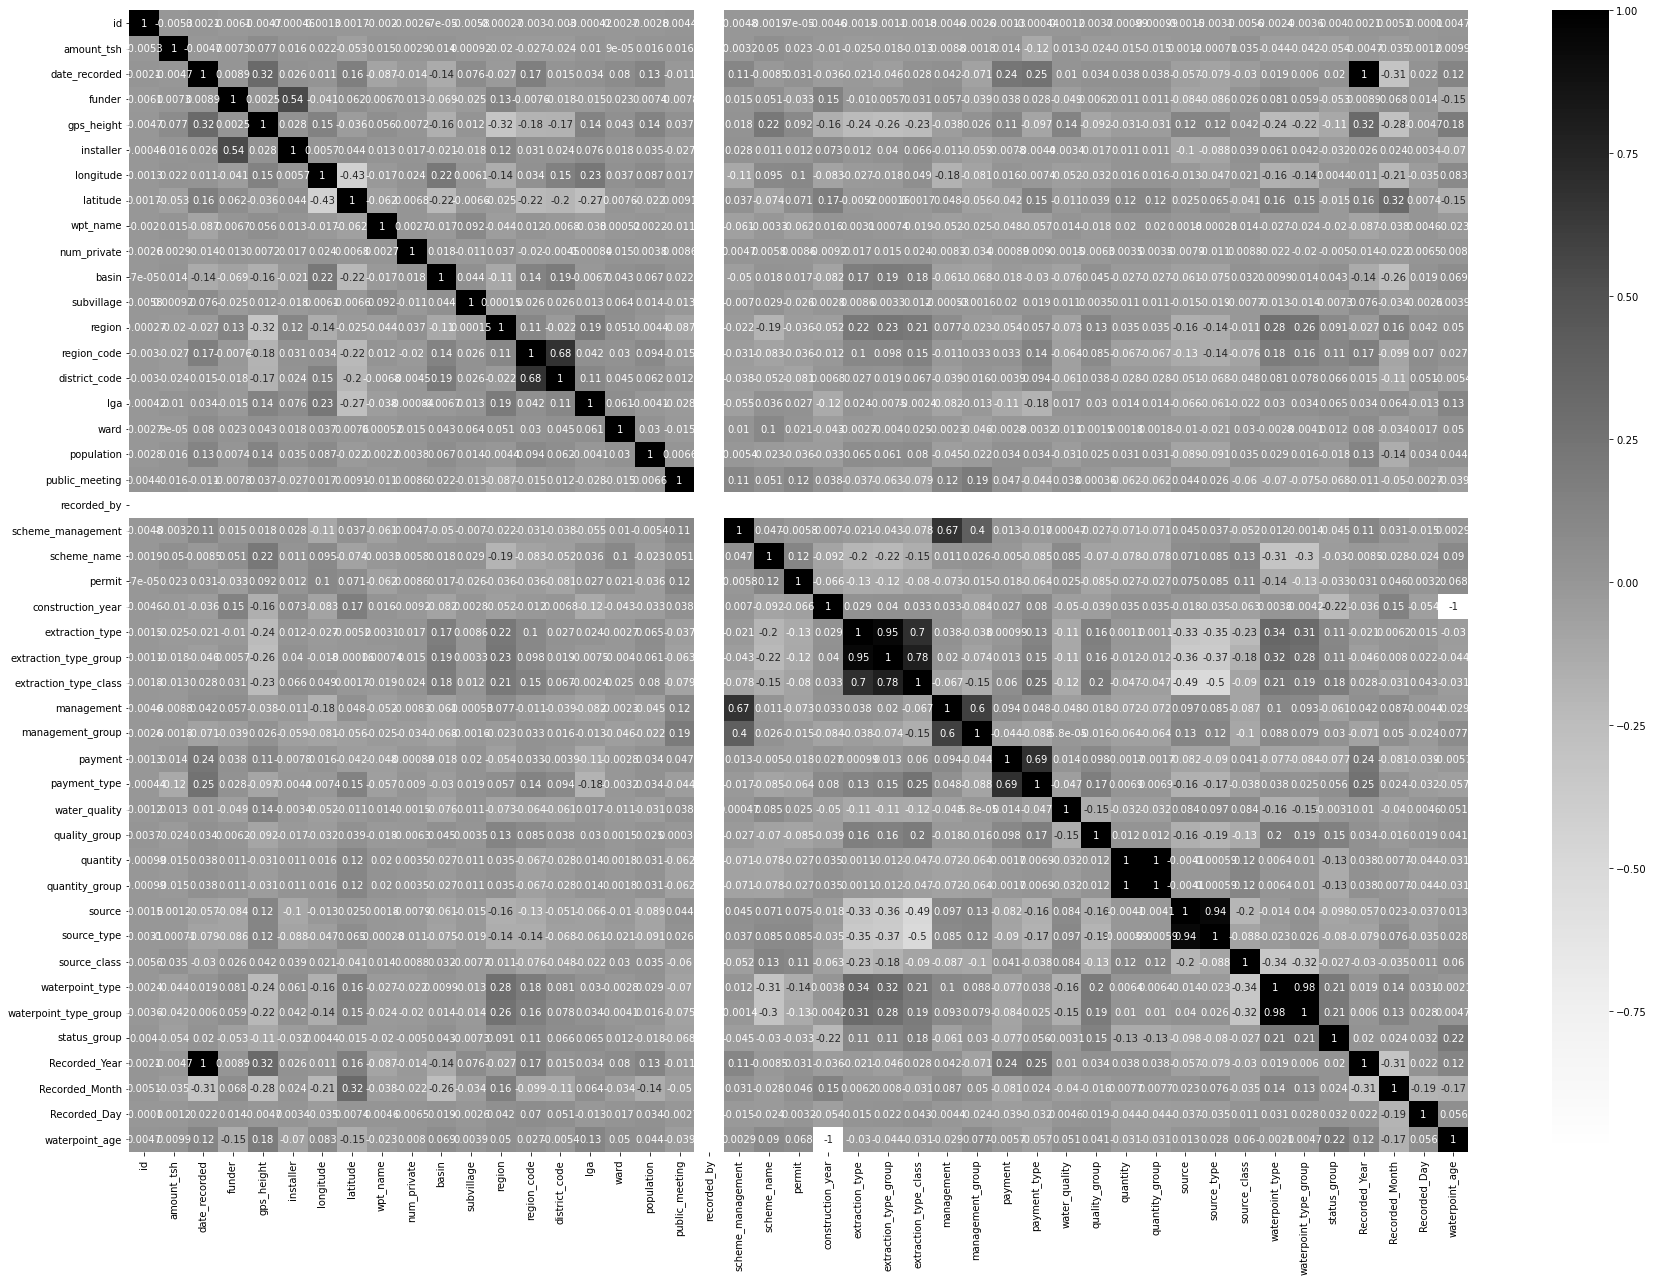

In [381]:
#plot Correlation matrix of our newly encoded dataset
plt.figure(figsize=(30,21))
sns.heatmap(train.corr(), cmap='Greys',annot=True)

In [439]:
y=train["status_group"]
x=train.drop(['id','status_group','recorded_by','Recorded_Year','Recorded_Month'], axis=1)
X_testing_data =testing_data.drop(['id','recorded_by','Recorded_Year','Recorded_Month'], axis=1)

In [440]:
#Split trainig set for training and testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0, test_size = 0.20,stratify=y, shuffle = True)
#Check shape of testing data
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((47520, 40), (11880, 40), (47520,), (11880,))

In [441]:
X_testing_data.head()

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,Recorded_Day,waterpoint_age
0,0.0,2013,175.0,1996,214.0,35.290799,-4.059696,656.0,0,0.0,3916.0,8.0,21,3,63.0,17.0,321,True,2.0,395.0,True,2012.0,9.0,6.0,3.0,3.0,2.0,0.0,2.0,6.0,2.0,3.0,3.0,5.0,3.0,1.0,6.0,5.0,4,1
1,0.0,2013,250.0,1569,221.0,36.656709,-3.309214,1780.0,0,5.0,2717.0,0.0,2,2,0.0,650.0,300,True,6.0,1610.0,True,2000.0,3.0,1.0,0.0,7.0,4.0,0.0,2.0,6.0,2.0,2.0,2.0,8.0,6.0,0.0,1.0,1.0,4,13
2,0.0,2013,250.0,1567,221.0,34.767863,-5.004344,9673.0,0,0.0,5398.0,18.0,13,2,109.0,1677.0,500,True,6.0,1453.0,True,2010.0,9.0,6.0,3.0,7.0,4.0,0.0,2.0,6.0,2.0,2.0,2.0,5.0,3.0,1.0,6.0,5.0,1,3
3,0.0,2013,222.0,267,262.0,38.058046,-9.418672,5595.0,0,7.0,2795.0,7.0,80,43,49.0,1192.0,250,True,6.0,395.0,True,1987.0,9.0,6.0,3.0,7.0,4.0,6.0,6.0,6.0,2.0,0.0,0.0,7.0,5.0,0.0,6.0,5.0,22,26
4,500.0,2013,73.0,1260,75.0,35.006123,-10.950412,5706.0,0,7.0,3544.0,16.0,10,3,61.0,1075.0,60,True,9.0,76.0,True,2000.0,3.0,1.0,0.0,9.0,4.0,3.0,1.0,6.0,2.0,1.0,1.0,8.0,6.0,0.0,1.0,1.0,27,13


In [442]:
#Import Standard Scalaer from SKlearn preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler

#define the scaler
scaler = StandardScaler().fit(x_train)
#Scale the train set
x_train = scaler.transform(x_train)
#scale the validation set
x_test = scaler.transform(x_test)
#Scale the test set
X_testing_data = scaler.transform(X_testing_data)

# Random Forest

In [443]:
RF = RandomForestClassifier( n_estimators =2000, random_state=1, class_weight='balanced')
model_rf = RF
model_rf.fit(x_train, y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=2000,
                       random_state=1)

In [444]:
print(model_rf.score(x_test, y_test))
y_pred=model_rf.predict(x_test)

0.8154040404040404


              precision    recall  f1-score   support

           0       0.81      0.90      0.85      6452
           1       0.57      0.35      0.44       863
           2       0.86      0.78      0.82      4565

    accuracy                           0.82     11880
   macro avg       0.75      0.68      0.70     11880
weighted avg       0.81      0.82      0.81     11880

[[5827  152  473]
 [ 435  305  123]
 [ 925   76 3564]]


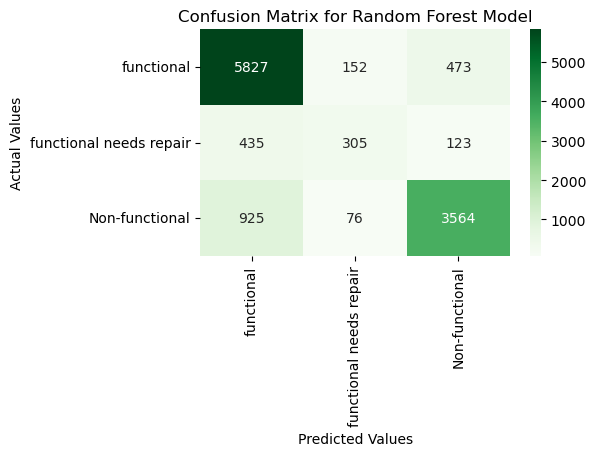

In [437]:
# Print classification report
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Plot Confusion Matrix
plt.figure(figsize=(5,3), dpi=100)
ax = sns.heatmap(cm, annot = True, fmt='d', xticklabels = ["functional", "functional needs repair", "Non-functional"], yticklabels = ["functional", "functional needs repair", "Non-functional"], cmap="Greens")
ax.set_xlabel("Predicted Values")
ax.set_ylabel("Actual Values")
ax.set_title("Confusion Matrix for Random Forest Model")
plt.show()

In [438]:
model_rf.feature_importances_
featureimp = pd.DataFrame({'Feature': testing_data.drop(['id','recorded_by','Recorded_Year'], axis=1).columns, 'Importance': model_rf.feature_importances_})
top10features = featureimp.sort_values(['Importance'], ascending=False).iloc[:]


print(top10features)

                  Feature  Importance
5               longitude    0.092536
6                latitude    0.081143
7                wpt_name    0.061000
10             subvillage    0.053499
32         quantity_group    0.050846
31               quantity    0.049832
3              gps_height    0.045204
39           Recorded_Day    0.037618
15                   ward    0.036062
16             population    0.031635
40         waterpoint_age    0.030441
21      construction_year    0.029145
2                  funder    0.028031
14                    lga    0.026531
4               installer    0.025625
19            scheme_name    0.022498
36        waterpoint_type    0.021992
24  extraction_type_class    0.019975
13          district_code    0.018758
12            region_code    0.016626
0              amount_tsh    0.015848
23  extraction_type_group    0.015690
11                 region    0.015678
37  waterpoint_type_group    0.015567
27                payment    0.015425
38         R

In [290]:
train.wpt_name.value_counts()

37399.0    3563
35529.0    1748
37195.0     830
29743.0     535
5142.0      323
1066.0      271
35863.0     260
33198.0     254
34404.0     208
34837.0     199
34804.0     152
34475.0     146
30338.0     133
29067.0     111
26923.0     104
28341.0      94
3337.0       94
36666.0      93
6648.0       90
29144.0      88
36621.0      84
1524.0       83
1513.0       81
6498.0       78
33176.0      76
29875.0      76
36212.0      73
1465.0       66
35896.0      66
26935.0      64
1089.0       61
28380.0      59
36798.0      57
6055.0       55
29290.0      52
5990.0       51
28682.0      49
34423.0      49
35627.0      47
33803.0      47
223.0        47
27156.0      47
36196.0      47
31107.0      45
1994.0       45
2094.0       43
2240.0       43
27933.0      43
29984.0      42
11849.0      42
27082.0      42
36289.0      42
12253.0      42
36479.0      40
12047.0      40
36176.0      40
33610.0      38
780.0        38
36719.0      38
28856.0      37
8901.0       36
36447.0      36
27004.0 

# KFold CV

#### Warning, Running This Section takes longer. Skip if possible.

In [445]:
#RF CV
import timeit
start = time.time()
start2 = timeit.default_timer()

kfold = model_selection.KFold(n_splits=10, random_state=1, shuffle=True)
rfcv_results = model_selection.cross_val_score(RF, x_train, y_train, cv=kfold, scoring='accuracy')
#Print Cross Validation Score Descriptive Statistics for Model
print(pd.DataFrame(rfcv_results,columns=['RF Cross-Validation Accuracy Scores']).describe())

duration = time.time() - start
print("Total duration: {}".format(duration))
stop = timeit.default_timer()
print('Time: ', stop - start2)


       RF Cross-Validation Accuracy Scores
count                            10.000000
mean                              0.808733
std                               0.006212
min                               0.798611
25%                               0.804661
50%                               0.808291
75%                               0.811711
max                               0.818813
Total duration: 4146.995742321014
Time:  4146.9968802


# Hyperparameter Tuning 

#### Warning, Running This Section takes longer. Skip if possible.

In [53]:
import timeit
from sklearn.model_selection import GridSearchCV
param_grid = { 
              "n_estimators" : [2100],
              "criterion" : ['entropy']
    "max_depth" : [15,20,22,24,26,28,30,32]
              }

              
start = time.time()
start2 = timeit.default_timer()


grid = GridSearchCV(estimator=RF, param_grid = param_grid, scoring='accuracy', cv=10, n_jobs=-1)
grid = grid.fit(x_train, y_train.values.ravel())

duration = time.time() - start
print(grid.best_score_)
print(grid.best_params_)
print(grid.cv_results_)
print("Total duration: {}".format(duration))

stop = timeit.default_timer()
print('Time: ', stop - start2)

0.8084806397306398
{'criterion': 'entropy', 'n_estimators': 2100}
{'mean_fit_time': array([372.722524  , 465.62777507]), 'std_fit_time': array([ 6.76326776, 78.20284161]), 'mean_score_time': array([4.86080163, 4.01149054]), 'std_score_time': array([0.18630782, 0.68284836]), 'param_criterion': masked_array(data=['gini', 'entropy'],
             mask=[False, False],
       fill_value='?',
            dtype=object), 'param_n_estimators': masked_array(data=[2100, 2100],
             mask=[False, False],
       fill_value='?',
            dtype=object), 'params': [{'criterion': 'gini', 'n_estimators': 2100}, {'criterion': 'entropy', 'n_estimators': 2100}], 'split0_test_score': array([0.80744949, 0.81102694]), 'split1_test_score': array([0.80366162, 0.80513468]), 'split2_test_score': array([0.80534512, 0.80450337]), 'split3_test_score': array([0.8108165 , 0.80997475]), 'split4_test_score': array([0.81039562, 0.81018519]), 'split5_test_score': array([0.81481481, 0.81565657]), 'split6_test_sco

# Submission

In [432]:
prediction = model_rf.predict(X_testing_data)
prediction

array([0, 0, 0, ..., 0, 0, 2])

In [433]:
#Un-encode predictions
prediction=le.inverse_transform(prediction)
prediction

array(['functional', 'functional', 'functional', ..., 'functional',
       'functional', 'non functional'], dtype=object)

In [434]:
#Create CSV file
Submission = pd.read_csv('SubmissionFormat.csv')
Submission['status_group'] = prediction
Submission.to_csv('RF_Submission_newV9.csv',index=False)
print("Submission file saved!")

Submission file saved!


In [435]:
Submission.head(10)

,id,status_group
0,50785,functional
1,51630,functional
2,17168,functional
3,45559,non functional
4,49871,functional
5,52449,functional
6,24806,functional
7,28965,non functional
8,36301,non functional
9,54122,functional


<AxesSubplot:title={'center':'Frequency Distribution for Predictions'}, xlabel='status_group', ylabel='count'>

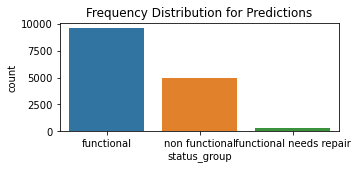

In [436]:
#Here, we visualize the Frequency of the Data
#The visualization shows us that the Data is imbalanced
plt.figure(figsize=(5, 2))
plt.title('Frequency Distribution for Predictions')
sns.countplot(x='status_group', data=Submission)